In [1]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

    protoFile = "pose/mpi/pose_deploy_linevec_faster_4_stages.prototxt"
    weightsFile = "pose/mpi/pose_iter_160000.caffemodel"
    nPoints = 15
    #POSE_PAIRS = [ [5,2], [2,3], [3,4], [5,6], [6,7]]
    POSE_PAIRS= [1,2,3,4,5,6,7]
    

In [9]:
frame = cv2.imread("single.jpeg")
frameCopy = np.copy(frame)
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
threshold = 0.2

#### Pass it through the network

In [10]:
inWidth = 368
inHeight = 368
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)

output = net.forward()
H = output.shape[2]
W = output.shape[3]

#### gather the points and plot the keypoints and the skeleton figure

left arm length: 338.409
left shoulder to neck + right shoulder to neck distance: 186.936
right arm length: 210.867


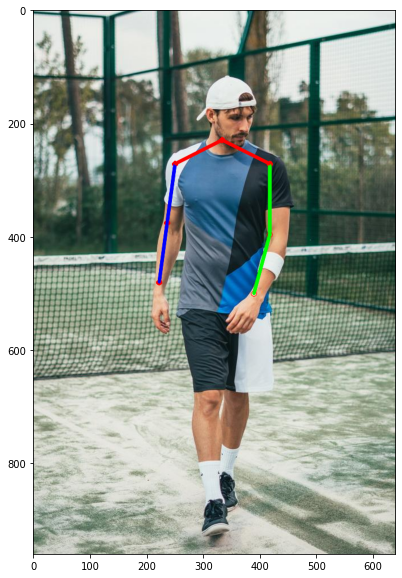

In [11]:
# Empty list to store the detected keypoints
points = []

for i in range(nPoints):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    
    # Scale the point to fit on the original image
    x = (frameWidth * point[0]) / W
    y = (frameHeight * point[1]) / H

    if prob > threshold : 
        #cv2.circle(frameCopy, (int(x), int(y)), 8, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
        #cv2.putText(frameCopy, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, lineType=cv2.LINE_AA)
        #cv2.circle(frame, (int(x), int(y)), 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)

        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
        
    else :
        points.append(None)
     
#Draw Skeleton
#Head – 0, Neck – 1, Right Shoulder – 2, Right Elbow – 3, Right Wrist – 4, Left Shoulder – 5, Left Elbow – 6, Left Wrist – 7,
#Right Hip – 8, Right Knee – 9, Right Ankle – 10, Left Hip – 11, Left Knee – 12, Left Ankle – 13, Chest – 14, Background – 15
for pair in POSE_PAIRS:
        partA=POSE_PAIRS[0] #1
        partB=POSE_PAIRS[1] #2
        partC=POSE_PAIRS[2] #3
        partD=POSE_PAIRS[3] #4
        partE=POSE_PAIRS[4] #5
        partF=POSE_PAIRS[5] #6
        partG=POSE_PAIRS[6] #7
        
        #left arm
        cv2.circle(frame, points[partE], 5, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.circle(frame, points[partF], 5, (0, 0, 255), thickness=1, lineType=cv2.FILLED)
        cv2.circle(frame, points[partG], 5, (0, 0, 255), thickness=1, lineType=cv2.FILLED)
        cv2.line(frame, points[partE], points[partF], (0, 255, 0), 3, lineType=cv2.LINE_AA)
        cv2.line(frame, points[partF], points[partG], (0, 255, 0), 3, lineType=cv2.LINE_AA)
        x1=cv2.norm(points[partE], points[partG])
        x2=cv2.norm(points[partF], points[partG])
        
        #right arm       
        cv2.circle(frame, points[partB], 5, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.circle(frame, points[partC], 5, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.circle(frame, points[partD], 5, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.line(frame, points[partB], points[partC], (255, 0, 0), 3, lineType=cv2.LINE_AA)
        cv2.line(frame, points[partC], points[partD], (255, 0, 0), 3, lineType=cv2.LINE_AA)
        z1=cv2.norm(points[partB], points[partC])
        z2=cv2.norm(points[partC], points[partD])
     
        #shoulders to neck
        cv2.circle(frame, points[partA], 5, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.line(frame, points[partA], points[partB], (0, 0, 255), 3, lineType=cv2.LINE_AA)
        left=cv2.norm(points[partA], points[partB])
        cv2.line(frame, points[partA], points[partE], (0, 0, 255), 3, lineType=cv2.LINE_AA)
        right=cv2.norm(points[partA], points[partE])
        
print("left arm length: {:.3f}".format(x1+x2))
print("left shoulder to neck + right shoulder to neck distance: {:.3f}".format(right+left))
print("right arm length: {:.3f}".format(z1+z2))

plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))